# Exam 1- Higgs ML Challenge

The HiggsML challenge was organized by ATLAS colleagues and ran on Kaggle's platform. The challenge provided a training and test set of Higgs and background events in CSV format. Using this data, participants were tasked with creating a classifier, which they submitted to Kaggle. Kaggle evaluated the classifier against another test set. At the end of the competition, the best performing classifiers were awarded a cash prize.

We will run a mini-competition, using the same data, as your first exam. Note that you will not need a Kaggle account, but may wish to get one to get more details.

The challenge is described in https://higgsml.lal.in2p3.fr

The Kaggle site is https://www.kaggle.com/c/higgs-boson

Detail description of the data and challenge: https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf

You are welcome to use Scikit or any other package you like.

Please separate different steps into different Jupyter Notebooks. For example:

    - Convert CSV to h5 format.
    - Load data and plot/compare variables.
    - Setup and Train the Classifier. Save the trained classifier (see http://scikit-learn.org/stable/modules/model_persistence.html )
    - Evaluate and compare different classifiers using ROC curves and metric defined by competition.

A copy of the data CSV files are on the cluster at: /data/afarbin/DLClass/HiggsML


In [1]:
!ls /data/afarbin/DLClass/HiggsML

Exam 1.ipynb  test.csv	training.csv


Note that the first line of the file contains the variable names:

In [1]:
!head -1 /data/afarbin/DLClass/HiggsML/training.csv

EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label


Some basic shell commands may help you. For example here is the number of lines (so N Events + variable names):

In [3]:
!wc -l /data/afarbin/DLClass/HiggsML/training.csv

250001 /data/afarbin/DLClass/HiggsML/training.csv


You can strip off the first line into a new file in your Exam directory:

In [4]:
!tail -25000 /data/afarbin/DLClass/HiggsML/training.csv > mytraining.csv

In [2]:
!head -1 mytrainingedit2.csv
!pwd
!ls

325000,-999.0,83.863,89.323,14.852,-999.0,-999.0,-999.0,2.193,14.852,92.155,0.642,-1.402,-999.0,56.112,-0.751,-2.935,36.043,-1.829,-1.027,68.9,0.973,171.752,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,4.33475402901,
/home/jluera/MyLabs/Labs/Exam
Exam.ipynb	mytraining.csv	    mytrainingedit2.csv
Untitled.ipynb	mytrainingedit.csv


# Prepping edited file for Variables

In [22]:
!head -2 mytraining.csv
VarNames=["EventID","DER_mass_MMC", "DER_mass_transverse_met_lep",
          "DER_mass_vis", "DER_pt_h", "DER_deltaeta_jet_jet", "DER_mass_jet_jet", 
          "DER_prodeta_jet_jet","DER_deltar_tau_lep", "DER_pt_tot", 
          "DER_sum_pt", "DER_pt_ratio_lep_tau","DER_met_phi_centrality",
          "DER_lep_eta_centrality", "PRI_tau_pt","PRI_tau_eta", 
          "PRI_tau_phi", "PRI_lep_pt", "PRI_lep_eta", "PRI_lep_phi",
          "PRI_met", "PRI_met_phi", "PRI_met_sumet", "PRI_jet_num", 
          "PRI_jet_leading_pt","PRI_jet_leading_eta", "PRI_jet_leading_phi",
          "PRI_jet_subleading_pt","PRI_jet_subleading_eta", 
          "PRI_jet_subleading_phi", "PRI_jet_all_pt","Weight","Label"]

#EventId,DER_mass_MMC,DER_mass_transverse_met_lep,
#DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,
#DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,
#DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,
#PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,
#PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,
#PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,
#PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label

325000,-999.0,83.863,89.323,14.852,-999.0,-999.0,-999.0,2.193,14.852,92.155,0.642,-1.402,-999.0,56.112,-0.751,-2.935,36.043,-1.829,-1.027,68.9,0.973,171.752,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,4.33475402901,b
325001,-999.0,94.737,39.619,29.276,-999.0,-999.0,-999.0,1.609,29.276,55.051,1.658,-1.204,-999.0,20.712,0.027,-0.695,34.339,-0.548,-2.198,66.207,1.173,125.794,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,4.75719501339,b


# Convert CSV to h5 format.

In [50]:
#Loading Libraries
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Loading the file from MyLabs
filename="/home/jluera/MyLabs/Labs/Exam/mytraining.csv"
#Removing the b's and s's out of the file using sed unix command

#!sed -e 's/b//g' mytraining.csv > mytrainingedit.csv
#!sed -e 's/s//g' mytrainingedit.csv > mytrainingedit2.csv

#Reading dataframe from csv file now
df = pd.read_csv(filename, names=VarNames)
#Replacing the b and s with integer values using .replace
df['Label'].replace('s', 1)
df['Label'].replace('b', 0)
#Column Insertion Not needed with original file, just took out dtype
#df.insert(0, 'EventID', range(len(df)))
df

AttributeError: 'DataFrame' object has no attribute 'Conversion'

# Load data and plot/compare variables.

In [27]:
#s = [[int('Label') for column in row] for ]]

s1 = int(float())
df_sig=df[df.Label=='s']
df_bkg=df[df.Label=='b']

DER_mass_MMC


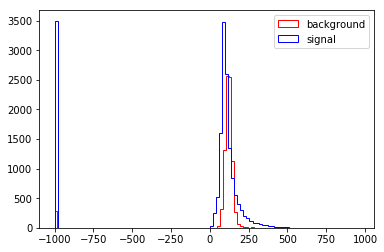

DER_mass_transverse_met_lep


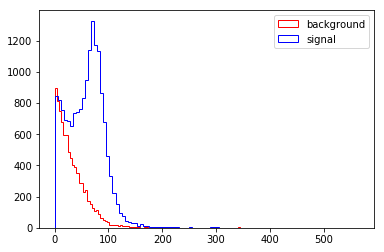

DER_mass_vis


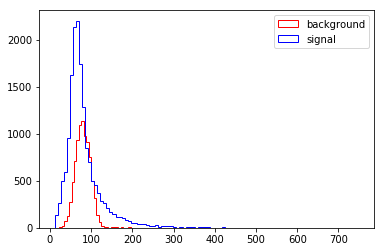

DER_pt_h


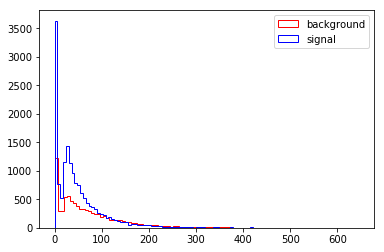

DER_deltaeta_jet_jet


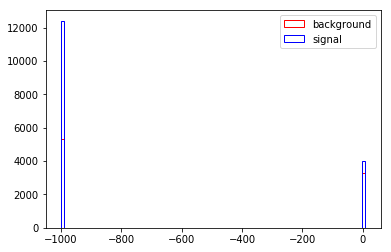

DER_mass_jet_jet


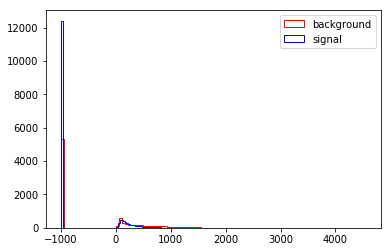

DER_prodeta_jet_jet


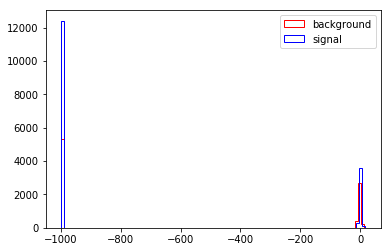

DER_deltar_tau_lep


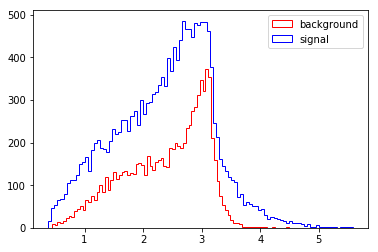

DER_pt_tot


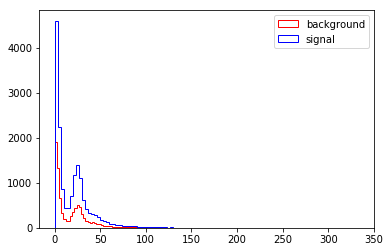

DER_sum_pt


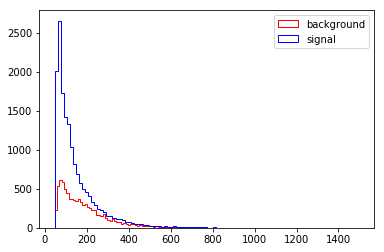

DER_pt_ratio_lep_tau


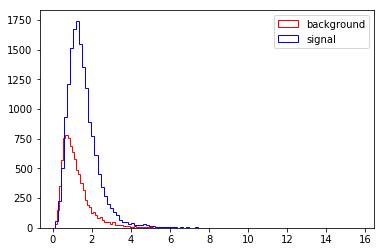

DER_met_phi_centrality


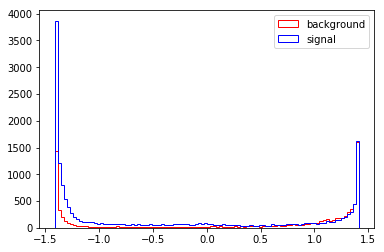

DER_lep_eta_centrality


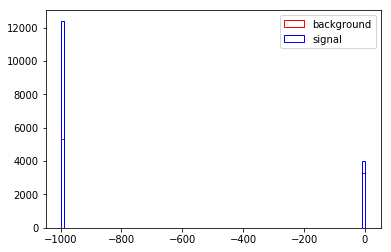

PRI_tau_pt


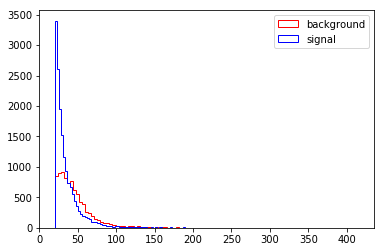

PRI_tau_eta


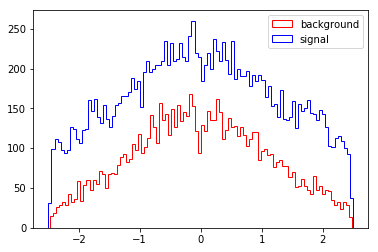

PRI_tau_phi


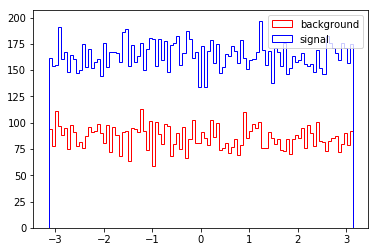

PRI_lep_pt


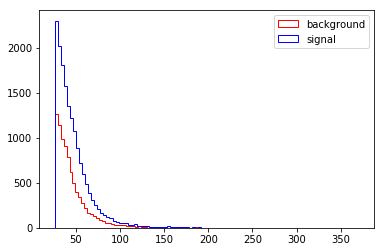

PRI_lep_eta


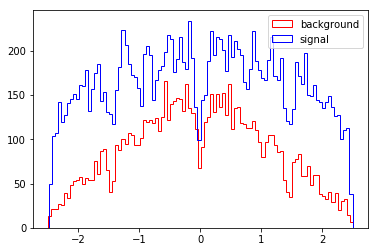

PRI_lep_phi


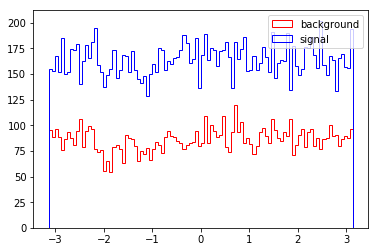

PRI_met


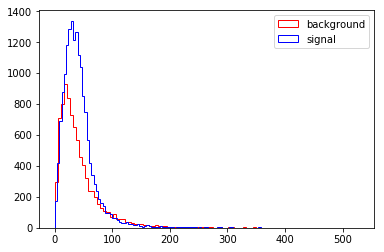

PRI_met_phi


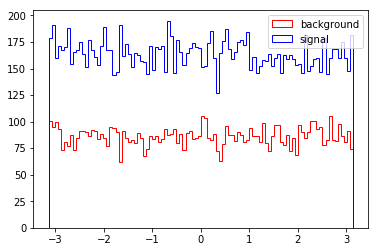

PRI_met_sumet


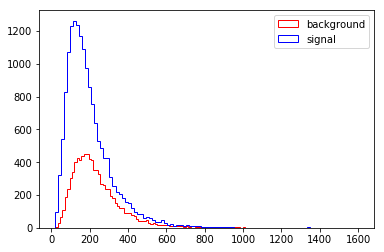

PRI_jet_num


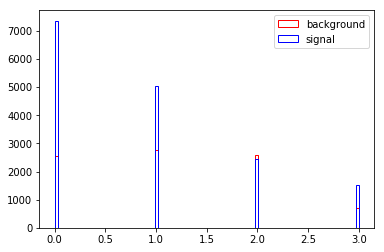

PRI_jet_leading_pt


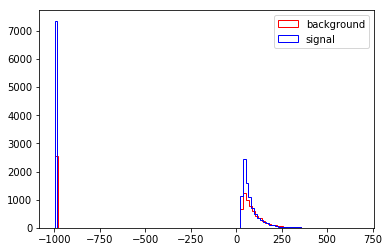

PRI_jet_leading_eta


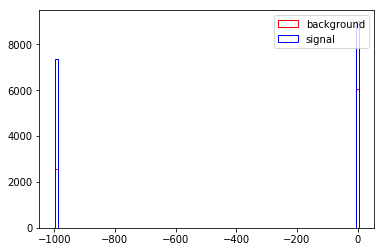

PRI_jet_leading_phi


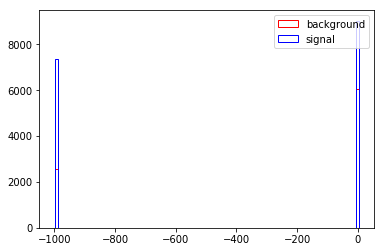

PRI_jet_subleading_pt


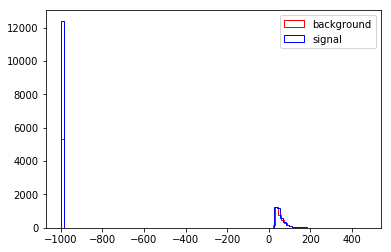

PRI_jet_subleading_eta


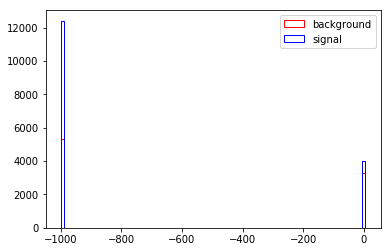

PRI_jet_subleading_phi


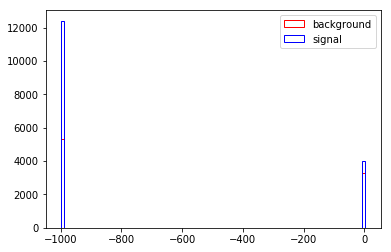

PRI_jet_all_pt


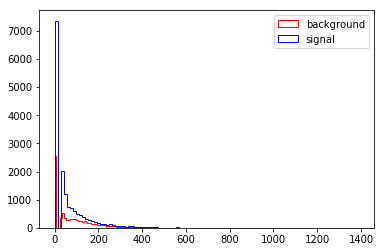

In [32]:
for var in VarNames[1:31]:
    print var
    plt.figure()
    plt.hist(df_sig[var],bins=100,histtype="step", color="re*d",label="background",stacked=True)
    plt.hist(df_bkg[var],bins=100,histtype="step", color="blue", label="signal",stacked=True)
    plt.legend(loc='upper right')
    plt.show()

# Setup and Train the Classifier. Save the trained classifier (see http://scikit-learn.org/stable/modules/model_persistence.html )

In [44]:
#Importing Libraries for Fisher and DA
import sklearn.discriminant_analysis as DA
Fisher = DA.LinearDiscriminantAnalysis()

In [45]:
#Training here
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]
X_TrainRaw=Train_Sample[VarNames]
y_TrainRaw=Train_Sample["Label"]

X_TestRaw=Test_Sample[VarNames]
y_TestRaw=Test_Sample["Label"]

Test_sigRaw=Test_Sample[Test_Sample.Label=='s']
Test_bkgRaw=Test_Sample[Test_Sample.Label=='b']


# Fitting Data here

In [47]:
Fisher.fit(X_TrainRaw, y_TrainRaw)

ValueError: could not convert string to float: b

In [35]:
#Importing Libraries
#from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
import numpy as np

from util import get_normalized_data, y2indicator


#Creating a Scalar
scaler = preprocessing.StandardScalar()
Weight_standardized = scaler.fit_transform(label='Weight')
features_standardized


AttributeError: 'module' object has no attribute 'StandardScalar'

ERROR: unknown command "sklearn" - maybe you meant "search"
